In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1),clip=True)
scaler.fit([[0], [100]])

MinMaxScaler(clip=True)

In [30]:
lde = pd.read_parquet('pred_deb_revised.gzip')
lro = pd.read_parquet('pred_drob_revised.gzip')
de = pd.read_parquet('pred_deb_nolora.gzip')
ro = pd.read_parquet('pred_drob_nolora2.gzip')
lde

,output
0,0.041210
1,0.027078
2,0.027495
3,0.026507
4,0.036205
...,...
68023,0.028280
68024,0.030568
68025,0.026511
68026,0.038131


In [31]:
ground = pd.read_parquet('test_drob_miv_nolora.gzip')
ground
# lde
# glro = pd.read_parquet('test_drob_ib_revised.gzip')
# globalde = pd.read_parquet('test_deb_ib_nolora.gzip')
# gro = pd.read_parquet('test_drob_ib_nolora.gzip')

,ingr,tags
47731,"[[MASK] (8 oz.) pkg. cream cheese, softened; 2...","[2.0, 2.0, 1.0, 1.0, 2.0, 1.0]"
22717,[[MASK] c. butter; 0.75 c. cocoa; 5 egg yolks;...,"[0.33, 0.75, 5.0, 0.75, 5.0, 1.0, 4.0, 1.5]"
83332,[[MASK] pint mayonnaise; 1 small Spinach Baby ...,"[1.0, 1.0, 0.25, 2.0, 1.0, 0.5, 1.0]"
59043,[[MASK] eggs; 0.5 c. oil; 1 c. sugar; 1 c. bro...,"[2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, ..."
74384,[[MASK] apples; 2 to 3 Tbsp. sugar; 1 to 2 Tbs...,"[5.0, 2.0, 1.0]"
...,...,...
89454,[[MASK] Tbsp. to 0.25 c. olive oil (only enoug...,"[2.0, 6.0, 1.0, 0.25]"
22451,"[[MASK] c. butter; 2 cloves garlic, minced; 0....","[0.25, 2.0, 0.25, 2.0, 0.5, 1.0, 1.0, 2.0, 1.0..."
33741,"[[MASK] c. graham crackers, crumbled; 0.25 lb....","[2.0, 0.25, 2.0, 2.0, 5.0, 1.0, 1.0]"
30476,[[MASK] lb. ground beef; 1 egg; 1 tsp. salt; 1...,"[1.5, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ..."


In [11]:
groundtags = [j for i in ground.tags.tolist() for j in i]
groundtags

[2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.33,
 0.75,
 5.0,
 0.75,
 5.0,
 1.0,
 4.0,
 1.5,
 1.0,
 1.0,
 0.25,
 2.0,
 1.0,
 0.5,
 1.0,
 2.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 5.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.5,
 0.25,
 2.0,
 1.0,
 0.12,
 1.0,
 0.5,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.5,
 1.5,
 0.67,
 2.0,
 0.5,
 0.5,
 0.5,
 8.0,
 3.0,
 1.0,
 1.0,
 1.0,
 4.0,
 0.25,
 0.25,
 1.0,
 4.0,
 8.0,
 1.0,
 1.0,
 1.5,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 0.5,
 1.0,
 1.0,
 0.33,
 1.0,
 3.0,
 1.0,
 0.75,
 2.0,
 0.5,
 3.0,
 3.0,
 6.0,
 3.5,
 1.0,
 0.25,
 0.25,
 1.0,
 1.0,
 2.0,
 1.0,
 4.0,
 0.12,
 2.0,
 0.75,
 0.5,
 1.0,
 8.0,
 0.25,
 1.0,
 0.5,
 0.5,
 0.5,
 3.25,
 0.5,
 2.0,
 1.0,
 1.5,
 1.5,
 2.0,
 0.5,
 2.5,
 0.5,
 1.0,
 0.33,
 2.0,
 1.5,
 1.5,
 1.0,
 2.0,
 2.0,
 0.5,
 2.0,
 0.25,
 2.0,
 0.25,
 2.0,
 1.0,
 0.5,
 1.0,
 2.0,
 0.5,
 1.75,
 1.0,
 4.0,
 0.5,
 1.25,
 2.0,
 4.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 5.0,


In [17]:
scaler.inverse_transform([lde.output.tolist()])[0]

4.1209787130355835

In [32]:
o1 = scaler.inverse_transform([lde.output.tolist()])[0]
o2 = scaler.inverse_transform([lro.output.tolist()])[0]
o3 = scaler.inverse_transform([de.output.tolist()])[0]
o4 = scaler.inverse_transform([ro.output.tolist()])[0]

In [33]:
print(mean_absolute_error(groundtags, o1))
print(mean_absolute_error(groundtags, o2))
print(mean_absolute_error(groundtags, o3))
print(mean_absolute_error(groundtags, o4))
# print(f1_score(o3, o4))

1.9552029641991346
1.5325218753821255
1.468883664398352
1.5363921928803392


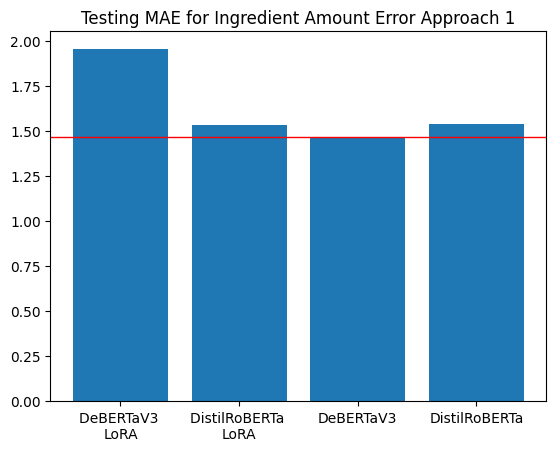

In [34]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nLoRA", "DistilRoBERTa \nLoRA", "DeBERTaV3", "DistilRoBERTa"])
y = np.array([mean_absolute_error(groundtags, o1), mean_absolute_error(groundtags, o2), mean_absolute_error(groundtags, o3), mean_absolute_error(groundtags, o4)])

plt.bar(x,y)
plt.title('Testing MAE for Ingredient Amount Error Approach 1')
# plt.ylim(0.995,1)
plt.axhline(y=min([mean_absolute_error(groundtags, o1), mean_absolute_error(groundtags, o2), mean_absolute_error(groundtags, o3), mean_absolute_error(groundtags, o4)]),linewidth=1, color='red')
plt.show()

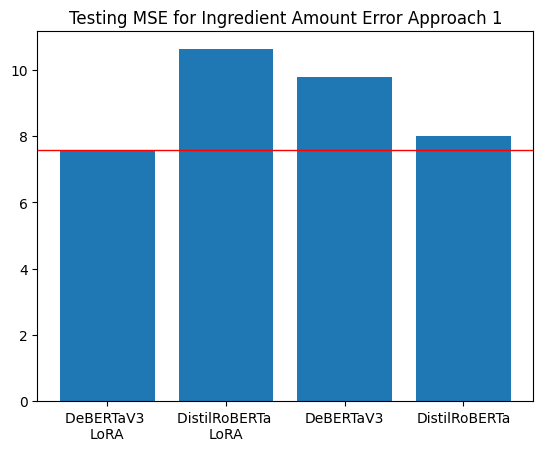

In [28]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nLoRA", "DistilRoBERTa \nLoRA", "DeBERTaV3", "DistilRoBERTa"])
y = np.array([mean_squared_error(groundtags, o1), mean_squared_error(groundtags, o2), mean_squared_error(groundtags, o3), mean_squared_error(groundtags, o4)])

plt.bar(x,y)
plt.title('Testing MSE for Ingredient Amount Error Approach 1')
# plt.ylim(0.995,1)
plt.axhline(y=min([mean_squared_error(groundtags, o1), mean_squared_error(groundtags, o2), mean_squared_error(groundtags, o3), mean_squared_error(groundtags, o4)]),linewidth=1, color='red')
plt.show()